In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
X=np.load("X (1).npy")
Y=np.load("Y (1).npy")

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [4]:
input_size = 101
hidden_size = 200
num_classes = 200
num_epochs = 5
batch_size = 100
learning_rate = 0.0001

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(p=.4)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.dropout(out)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.relu(out)
        return out

In [6]:
model = Net(input_size,hidden_size,num_classes)
model.cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
X_train.shape[0]//10

292

In [8]:
Y_train.shape

(2923,)

In [9]:
epochs = 10000

In [10]:
X_train[:-3].shape

(2920, 101)

In [33]:
# test
losses=[]
dev_set_loss=[]
for epoch in range(epochs):
    
    epoch +=1
    for x,y in zip(np.split(X_train[:-3],X_train.shape[0]//10,axis=0),np.split(Y_train[:-3],Y_train.shape[0]//10,axis=0)):
        x=torch.from_numpy(x)
        y=torch.from_numpy(y)

        inputs = Variable(x.type(torch.cuda.FloatTensor))
        labels = Variable(y.type(torch.cuda.LongTensor))

        #clear grads
        optimizer.zero_grad()
        #forward to get predicted values
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)

        losses.append(float(loss))
        loss.backward()# back props
        optimizer.step()# update the parameters
    if(epoch%10 == 0):
        print("{} : {}".format(epoch,float(loss)))

10 : 0.0003294944763183594
20 : 0.0010057449107989669
30 : 0.02921733818948269
40 : 0.0027200698386877775
50 : 0.023241901770234108
60 : 0.0045227049849927425
70 : 0.017035961151123047
80 : 0.0007905960083007812
90 : 0.0056320191361010075
100 : 0.0017828941345214844
110 : 0.012082194909453392
120 : 0.0004860878107137978
130 : 0.006000423338264227
140 : 0.003907680511474609
150 : 0.006641483400017023
160 : 0.0018233299488201737
170 : 0.009909629821777344
180 : 0.001825618790462613
190 : 0.11467504501342773
200 : 0.003722286317497492
210 : 0.002323722932487726
220 : 0.001446628593839705
230 : 0.004514789674431086
240 : 0.011658191680908203
250 : 0.0028302192222326994
260 : 0.00053319928701967
270 : 0.00025653839111328125
280 : 0.005766677670180798
290 : 0.0893397331237793
300 : 0.00027294160099700093
310 : 8.049011375987902e-05
320 : 0.03471040725708008
330 : 0.0005620956653729081
340 : 0.12432785332202911
350 : 0.05651378631591797
360 : 0.0009113311534747481
370 : 0.00141735072247684
38

KeyboardInterrupt: 

## Evaluate the performance on the training data

In [34]:
# X_train and Y_train
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.cuda.FloatTensor)))

train_correct=0
Y_train_pred=[]
total_train_compounds=len(Y_train)
for i,train_compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(train_compound,0)
    Y_train_pred.append(int(max_index))
    if (int(max_index)==Y_train[i]):
        train_correct+=1

print("The train accuracy is {}".format((train_correct/total_train_compounds)*100))

The train accuracy is 98.52890865549094


## Evaluate the model on the testing data

In [35]:
# X_test and Y_test
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

The test accuracy is 77.23076923076924


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
## Saved , uncomment the below line if you want to save it
# np.save("Y_test",Y_test)
# np.save("Y_test_pred.npy",np.array(Y_test_pred))

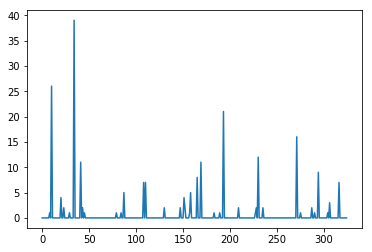

In [36]:
plt.plot(Y_test_pred)

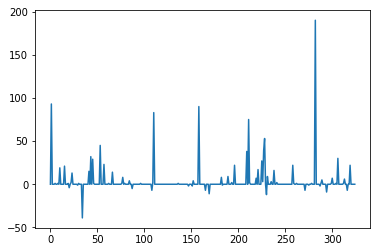

In [37]:
plt.plot(Y_test-Y_test_pred)

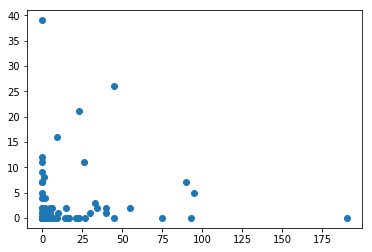

In [38]:
plt.scatter(Y_test,Y_test_pred)

In [39]:
## For the entire dataset

In [40]:
#X and Y
model_pred=model(Variable(torch.from_numpy(X).type(torch.cuda.FloatTensor)))
correct=0
Y_pred=[]
total_compounds=len(Y)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_pred.append(int(max_index))
    if (int(max_index)==Y[i]):
        correct+=1

print("The total accuracy is {}".format((correct/total_compounds)*100))

The total accuracy is 96.39778325123153


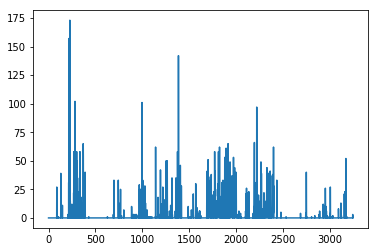

In [41]:
plt.plot(Y_pred)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mean_squared_error(Y_train,Y_train_pred)*19/200

4.6108313376667809

In [44]:
mean_squared_error(Y_test,Y_test_pred)*19/200

24.328476923076924

In [45]:
mean_squared_error(Y,Y_pred)*19/200

6.833974753694581